# Visual Analytics

## Using Schneiderman's mantra within the Visual Analytics Process:

Use visualisation for analysis according the each research question starting from Q1 to Q4. Each research question has a slightly different preprocessed dataset, that originally comes from the same source, and undertook the same handling of missing values.

**Note: Near the end of Question 1, I had to go back to the preprocessing stage because I realised that NaPTAN included many types of stops. Therefore, I had to Filter further to only include Bus Stops**

## **Q1: Categorisation of Southern and Northern Stops** - 
- **Research Question**: How is the distribution of Stop Types and Bus Stop Types differentiated between northern and southern areas and how do they influence the accessibility of public transport?

### Overview: Looking at different plots and graphs for categorical data to gain understanding.


In [6]:
!pip install folium

   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ------- ------------------------------- 20.5/110.5 kB 330.3 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/110.5 kB 656.4 kB/s eta 0:00:01
   ---------------------------------------- 110.5/110.5 kB 1.1 MB/s eta 0:00:00


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

- Using Parquet formats to preserve the data types from data_preprocessing.ipynb

In [17]:
# Loading the dataset
data = pd.read_parquet('../data/processed/q1_processed_stops.parquet')
print(data.dtypes)
print(data.head())

ATCOCode                             category
NaptanCode                           category
CommonName                           category
NptgLocalityCode                     category
LocalityName                         category
LocalityCentre                           bool
Easting                                 int64
Northing                                int64
Longitude                             float64
Latitude                              float64
StopType                             category
BusStopType                          category
TimingStatus                         category
AdministrativeAreaCode                  int64
CreationDateTime          datetime64[ns, UTC]
ModificationDateTime      datetime64[ns, UTC]
RevisionNumber                          int32
Modification                         category
Status                               category
SouthNorthCategory                     object
StopDensity                             int64
dtype: object
       ATCOCode Napt

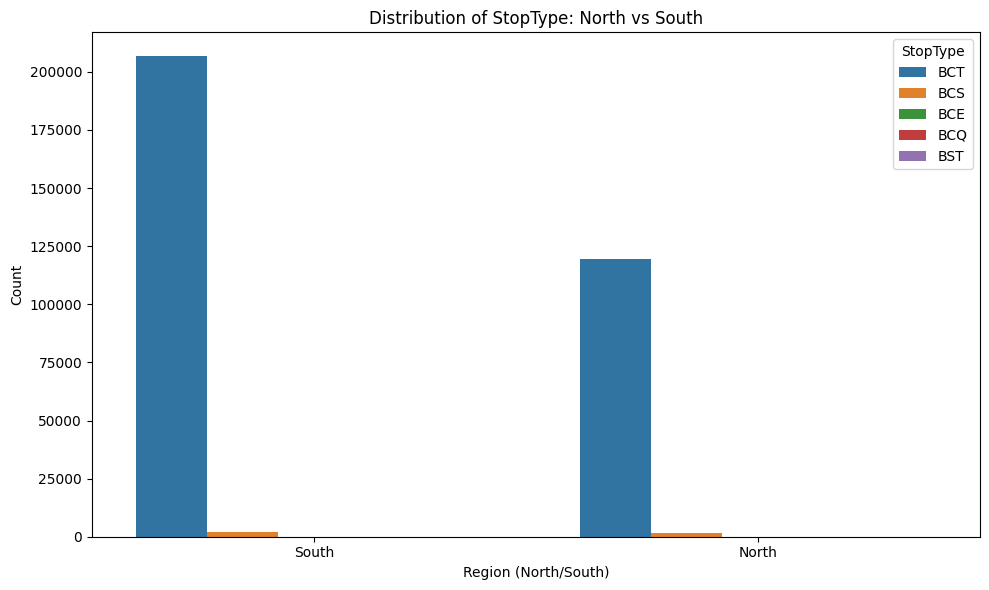

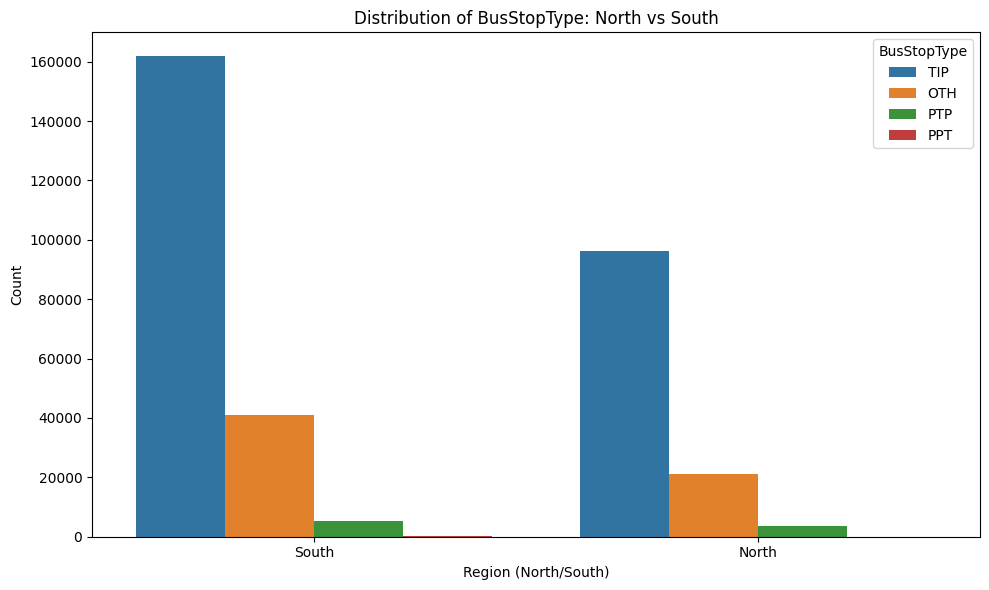

In [18]:
# Filter the data to include relevant StopTypes
relevant_stoptypes = ['BCT', 'BCS', 'BCE', 'BCQ', 'BST']
filtered_data = data[data['StopType'].isin(relevant_stoptypes)]

# Count plot for StopType distribution between North and South
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='SouthNorthCategory', hue='StopType', hue_order=relevant_stoptypes)
plt.title('Distribution of StopType: North vs South')
plt.xlabel('Region (North/South)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../outputs/stop_type_distribution.png')  # Saving the plot
plt.show()

# Filter the data to include relevant BusStopTypes
relevant_bus_stoptypes = ['TIP', 'OTH', 'PTP', 'PPT']
filtered_data_bus = filtered_data[filtered_data['BusStopType'].isin(relevant_bus_stoptypes)]

# Count plot for BusStopType distribution between North and South
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data_bus, x='SouthNorthCategory', hue='BusStopType', hue_order=relevant_bus_stoptypes)
plt.title('Distribution of BusStopType: North vs South')
plt.xlabel('Region (North/South)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../outputs/bus_stop_type_distribution.png')  # Saving the plot
plt.show()

- StopType Distribution:  BCT is very dominant. It is hard to see the other categories. I will transform the y axis to a log scale and possibly remove the most dominant variable.
- BusStopType Distribution: TIP is very dominant

### Zoom: **Using Folium to Create Map for London**

In [44]:
# Creating map centered around a specific location like London
#m = folium.Map(location = [51.5074, -0.1278], zoom_start = 6)

# Initialising the  MarkerCluster to group nearby markers
#marker_cluster = MarkerCluster().add_to(m)

#for _, row in data.iterrows():
    #folium.CircleMarker(
        #location = [row['Latitude'], row['Longitude']],
        #radius = 5,
        #color = 'blue' if row['UrbanRuralCategory'] == 'Urban' else 'green',
        #fill = True,
        #fill_color='blue' if row['UrbanRuralCategory'] == 'Urban' else 'green',
        #fill_opacity = 0.7,
        #popup = f"StopType: {row['StopType']}<br>BusStopType: {row['BusStopType']}<br>Location: {row['Latitude']}, {row['Longitude']}"
#    ).add_to(marker_cluster)
    
# Saving the map as an HTML file
#m.save('../outputs/choropleth_map.html')

### 2nd Iteration Zoom, Overview, Detail-on-demand : **Using Tableau**

- I am not suprised that there would be issues here. The size of dataset, which has over 30,000 data items, is far too much for HTML interative maps.
- I am going to do the maps on Tableau 2024.
- I used Tableau for Longitude and Latitude, using the classification of North and South
- I saw that there were three data point out of place so I've decided to remove them.

In [23]:
# Define the ATCOCode values to remove
codes_to_remove = ['260000T11', '5720WDB48433', '5710WDB48478', '260000T12', '260000T13']

# Filter out rows with the specified ATCOCode values
filtered_data = data[~data['ATCOCode'].isin(codes_to_remove)]

# Verifying the results
print("Filtered dataset shape:", filtered_data.shape)
print("Number of outliers removed:", data.shape[0] - filtered_data.shape[0])

# Save the filtered dataset (optional)
filtered_data.to_parquet('../data/processed/q1_processed_stops_filtered.parquet', index=False)

# This filtered data will be exported to Tableau.
filtered_data.to_csv('../data/processed/q1_processed_stops.csv', index = False)

# Parquet is not supported, but I will keep it for when I'm finished on Tableau
filtered_data.to_parquet('../data/processed/filtered_data.parquet')

Filtered dataset shape: (329444, 21)
Number of outliers removed: 5


### ** Filter: Side-by-side count charts using y log scale**

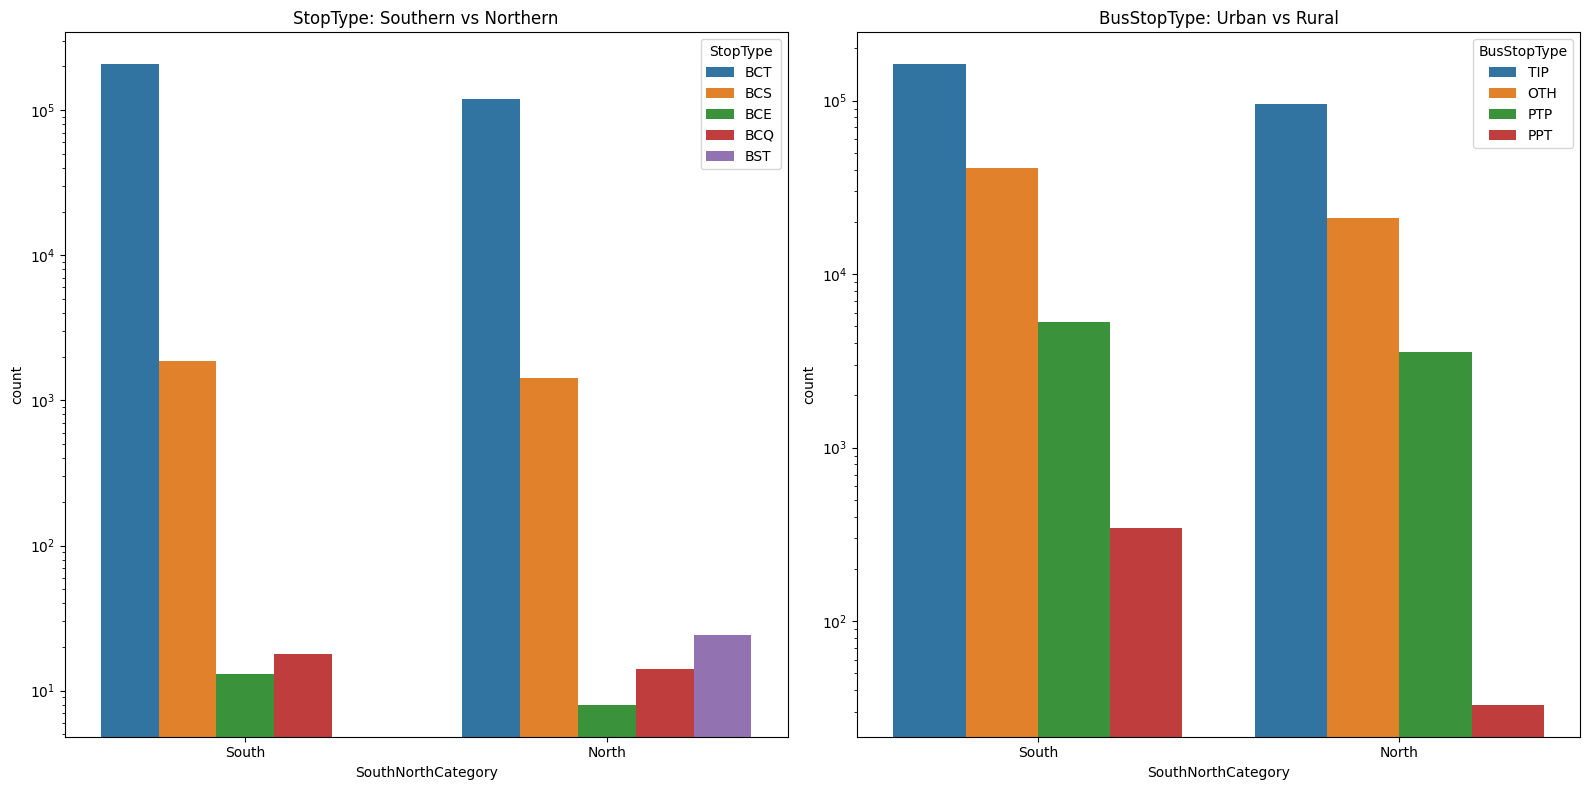

In [20]:
# Filtering the data to include only relevant StopTypes and BusStopTypes
relevant_stoptypes = ['BCT', 'BCS', 'BCE', 'BCQ', 'BST']
relevant_bus_stoptypes = ['TIP', 'OTH', 'PTP', 'PPT']  

# Filtering data for relevant StopTypes and BusStopTypes
filtered_data = data[data['StopType'].isin(relevant_stoptypes) & data['BusStopType'].isin(relevant_bus_stoptypes)]

# Plotting side-by-side bar charts for StopType and BusStopType distribution
fig, axes = plt.subplots(1, 2, figsize = (16, 8))
 
# StopType
sns.countplot(data=filtered_data, x = 'SouthNorthCategory', hue = 'StopType', ax=axes[0], hue_order=relevant_stoptypes)
axes[0].set_title('StopType: Southern vs Northern')
axes[0].set_yscale('log')  # Applying log scale to the y-axis

# BusStopType
sns.countplot(data=filtered_data, x='SouthNorthCategory', hue = 'BusStopType', ax = axes[1], hue_order=relevant_bus_stoptypes)
axes[1].set_title('BusStopType: Urban vs Rural')
axes[1].set_yscale('log')  # Applying log scale to the y-axis

plt.tight_layout()
plt.savefig('../outputs/stop_type_bus_stop_type_comparison.png')
plt.show()

### **Filter** - Excluding dominant classes for the sake of imbalance and variability

Initial data shape: (330919, 21)
Unique StopType: ['BCT' 'BCS' 'BCE' 'TXR' 'RSE' 'FTD' 'BCQ' 'BST' 'AIR' 'TMU' 'STR' 'PLT'
 'MET']
Unique BusStopType: ['TIP' 'OTH' 'PTP' 'PPT']
Filtered data shape: (1, 21)
Filtered StopType: ['BCQ']
Filtered BusStopType: ['OTH']


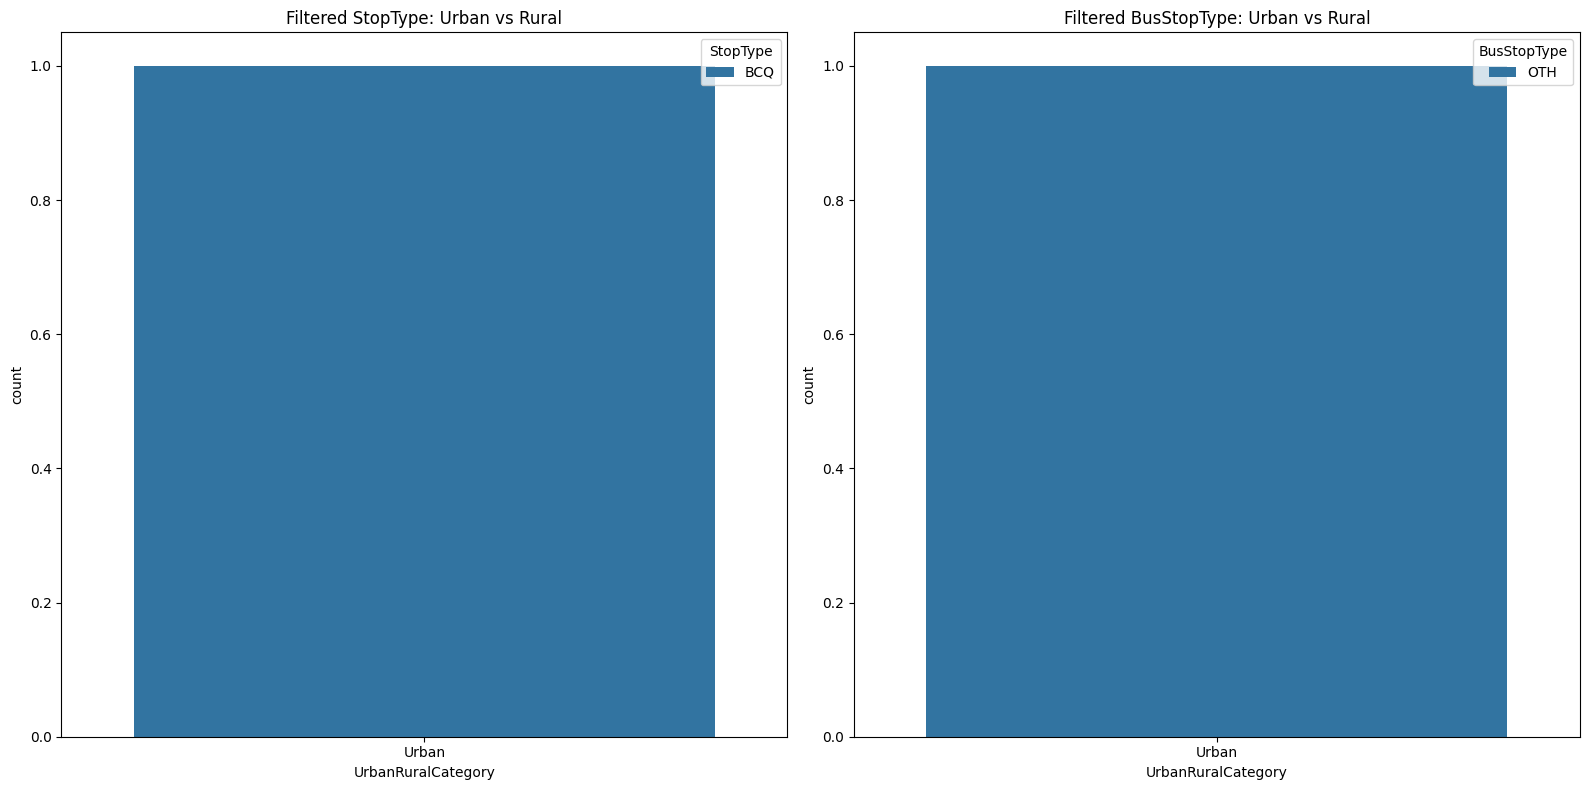

In [40]:
# Check initial dataset size and unique values
#print("Initial data shape:", data.shape)
#print("Unique StopType:", data['StopType'].unique())
#print("Unique BusStopType:", data['BusStopType'].unique())

# Filtering out the dominant StopType and BusStopType categories
#filtered_data = data[
#    ~data['StopType'].isin(['BCT']) & ~data['BusStopType'].isin(['TIP'])
#]

# Check filtered dataset size and unique values
#print("Filtered data shape:", filtered_data.shape)
#print("Filtered StopType:", filtered_data['StopType'].unique())
#print("Filtered BusStopType:", filtered_data['BusStopType'].unique())


# Plotting side-by-side count plots for filtered data
#fig, axes = plt.subplots(1,2, figsize = (16, 8))

# StopType
#sns.countplot(data = filtered_data, x = 'UrbanRuralCategory', hue = 'StopType', ax = axes[0])
#axes[0].set_title('Filtered StopType: Urban vs Rural')

# BusStopType
#sns.countplot(data = filtered_data, x = 'UrbanRuralCategory', hue = 'BusStopType', ax = axes[1])
#axes[1].set_title('Filtered BusStopType: Urban vs Rural')

#plt.tight_layout()
#plt.savefig('../outputs/WRONG_filtered_stop_type_ALL_STOP_TYPES_comparison.png')
#plt.show()

- Removing BCT and TIP (Timing Info Point), leaves almost no data to give any insights. Therefore the filtering criteria is too strict. Let's filter out TIP instead of both TIP and BCS.

Initial data shape: (330919, 21)
Unique StopType: ['BCT' 'BCS' 'BCE' 'TXR' 'RSE' 'FTD' 'BCQ' 'BST' 'AIR' 'TMU' 'STR' 'PLT'
 'MET']
Unique BusStopType: ['TIP' 'OTH' 'PTP' 'PPT']
Filtered data shape: (4837, 21)
Filtered StopType: ['BCS' 'BCE' 'TXR' 'RSE' 'FTD' 'BCQ' 'BST' 'AIR' 'TMU' 'STR' 'PLT' 'MET']
Filtered BusStopType: ['TIP' 'OTH']


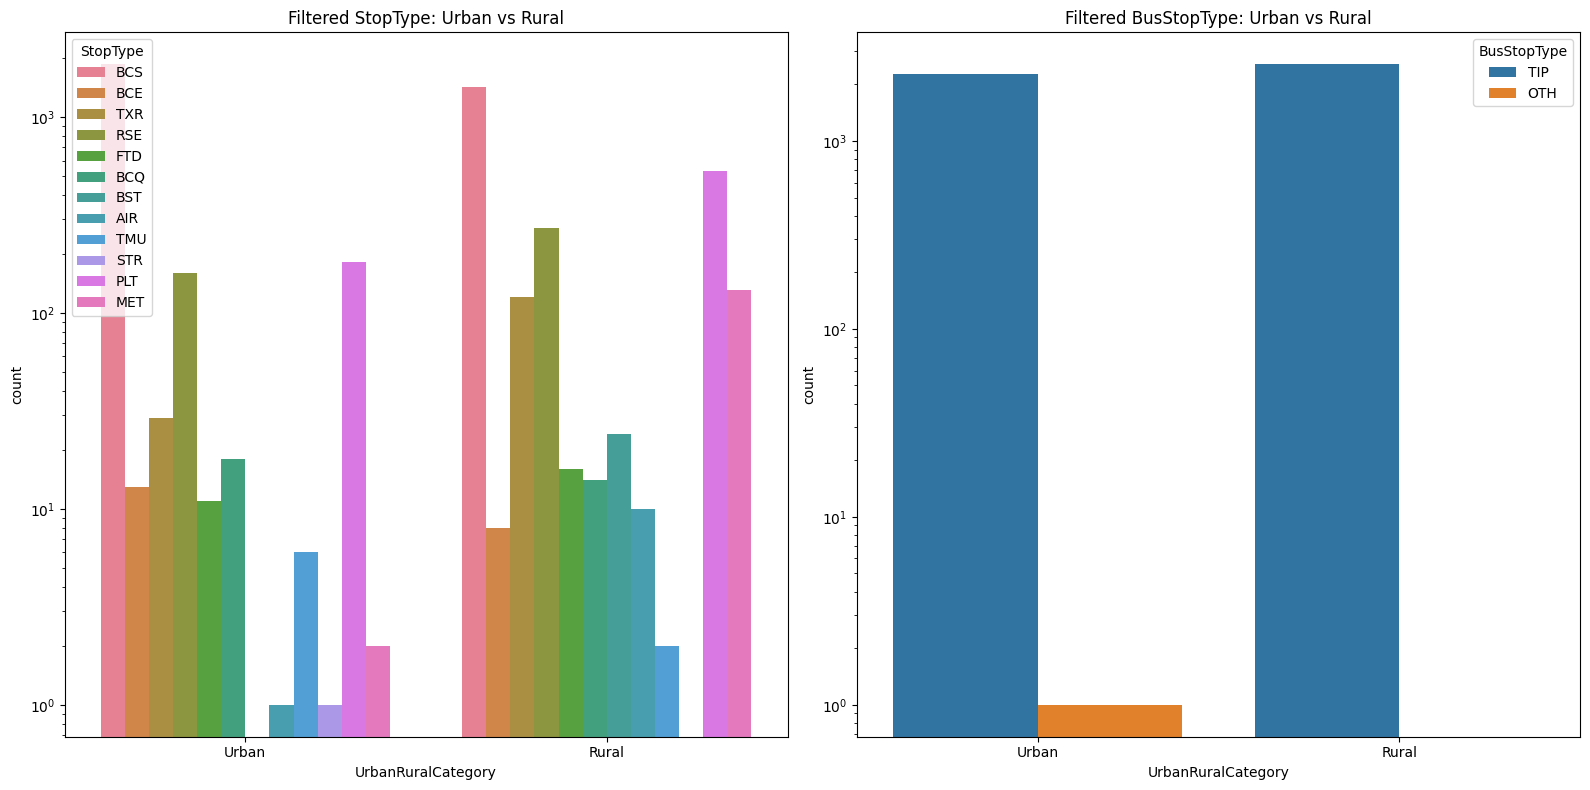

In [38]:
# Check initial dataset size and unique values
#print("Initial data shape:", data.shape)
#print("Unique StopType:", data['StopType'].unique())
#print("Unique BusStopType:", data['BusStopType'].unique())

# Filtering out the dominant BusStopType category
#filtered_data = data[
#    ~data['StopType'].isin(['BCT'])
#]

# Check filtered dataset size and unique values
#print("Filtered data shape:", filtered_data.shape)
#print("Filtered StopType:", filtered_data['StopType'].unique())
#print("Filtered BusStopType:", filtered_data['BusStopType'].unique())

# Plotting side-by-side count plots for filtered data
#fig, axes = plt.subplots(1,2, figsize = (16, 8))

# StopType
#sns.countplot(data = filtered_data, x = 'UrbanRuralCategory', hue = 'StopType', ax = axes[0])
#axes[0].set_title('Filtered StopType: Urban vs Rural')
#axes[0].set_yscale('log') 

# BusStopType
#sns.countplot(data = filtered_data, x = 'UrbanRuralCategory', hue = 'BusStopType', ax = axes[1])
#axes[1].set_title('Filtered BusStopType: Urban vs Rural')
#axes[1].set_yscale('log') 

#plt.tight_layout()
#plt.savefig('../outputs/WRONG_filtered_stop_type_ALL_STOP_TYPES_comparison_improved.png')
#plt.show()

- The StopTypes are more balanced while using the y log scale, but I have come to the realisation through research, that many of the StopTypes do not represent Bus Stops according to this source, https://crystalroof.co.uk/api-docs/method/transport-closest-bus-stops and https://naptan.dft.gov.uk/naptan/schema/2.4/doc/NaPTANSchemaGuide-2.4-v0.57.pdf
-  **I have to go back to the preprocessing file and filter again to refine my analysis. I was able to see this with the combination of human reasoning from the imbalanced side-by-side count plots.**

### **2nd Iteration with only Bus stops**
## **Filter** - Excluding dominant classes for the sake of imbalance and variability

1. Using Undersampling on the dominant classes of BCT for StopType and TIP for BusStopType
2. Keeping the y log scale so that the differences are easier to visualise.
3. Attempting to balance the dataset to see the full picture of stop types and bus stop types


In [16]:
print(filtered_data.columns)
print(filtered_data_bus.columns)
print(balanced_bus_stop_type_data.columns)

Index(['ATCOCode', 'NaptanCode', 'CommonName', 'NptgLocalityCode',
       'LocalityName', 'LocalityCentre', 'Easting', 'Northing', 'Longitude',
       'Latitude', 'StopType', 'BusStopType', 'TimingStatus',
       'AdministrativeAreaCode', 'CreationDateTime', 'ModificationDateTime',
       'RevisionNumber', 'Modification', 'Status', 'SouthNorthCategory',
       'StopDensity'],
      dtype='object')
Index(['ATCOCode', 'NaptanCode', 'CommonName', 'NptgLocalityCode',
       'LocalityName', 'LocalityCentre', 'Easting', 'Northing', 'Longitude',
       'Latitude', 'StopType', 'BusStopType', 'TimingStatus',
       'AdministrativeAreaCode', 'CreationDateTime', 'ModificationDateTime',
       'RevisionNumber', 'Modification', 'Status', 'StopDensity',
       'UrbanRuralCategory'],
      dtype='object')
Index(['ATCOCode', 'NaptanCode', 'CommonName', 'NptgLocalityCode',
       'LocalityName', 'LocalityCentre', 'Easting', 'Northing', 'Longitude',
       'Latitude', 'StopType', 'BusStopType', 'TimingS

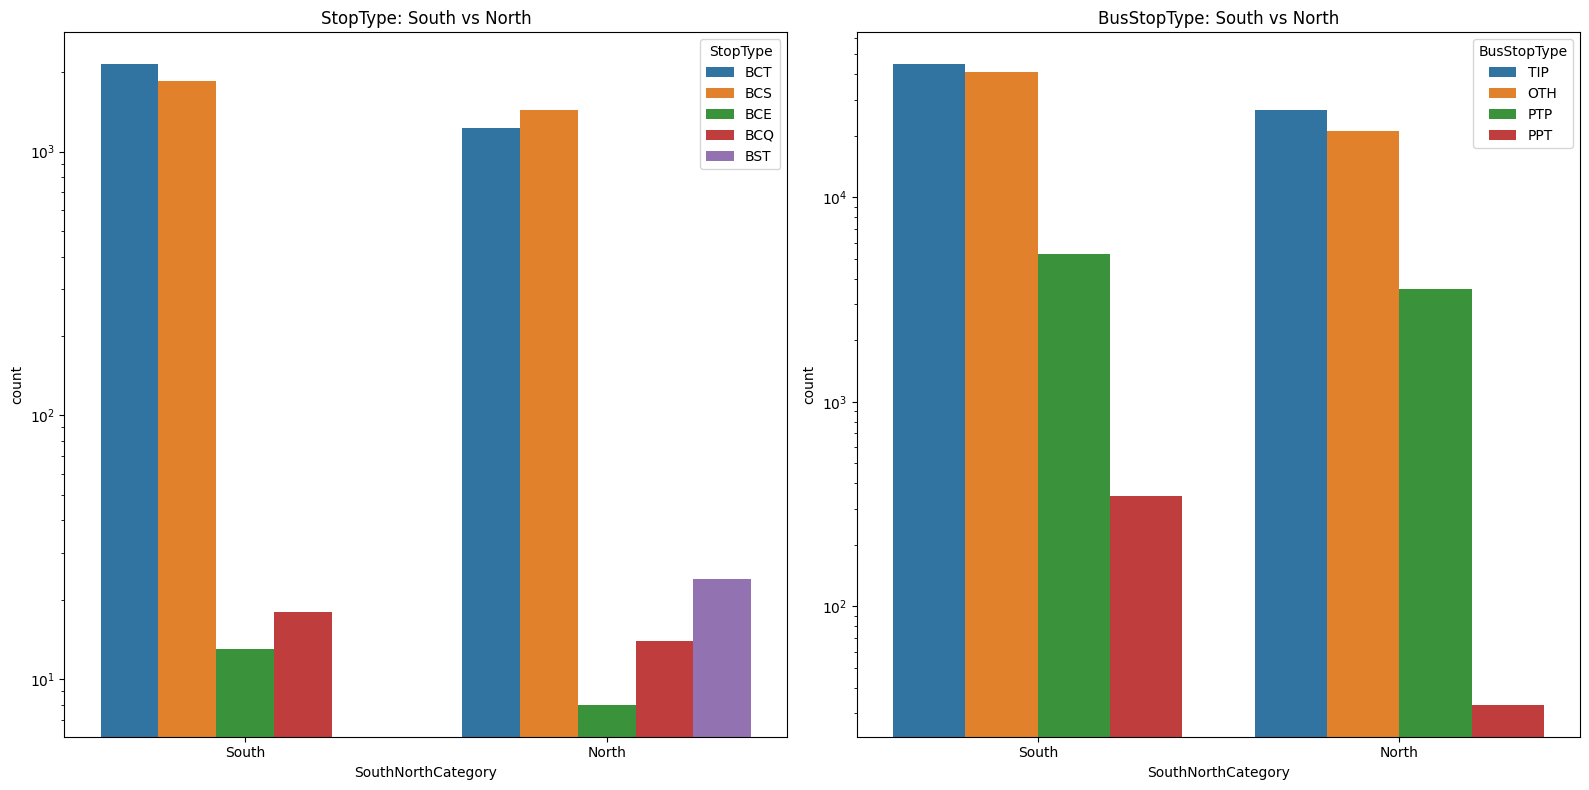

In [21]:

# Resampling StopType to balance the classes
bct_data = filtered_data[filtered_data['StopType'] == 'BCT']
non_bct_data = filtered_data[filtered_data['StopType'] != 'BCT']
bct_data_undersampled = resample(bct_data, replace=False, n_samples=len(non_bct_data), random_state=1)

# Resampling BusStopType to balance the classes (TIP)
tip_data = filtered_data_bus[filtered_data_bus['BusStopType'] == 'TIP']
non_tip_data = filtered_data_bus[filtered_data_bus['BusStopType'] != 'TIP']
tip_data_undersampled = resample(tip_data, replace=False, n_samples=len(non_tip_data), random_state=1)

# Combine the undersampled data back
balanced_stop_type_data = pd.concat([bct_data_undersampled, non_bct_data])
balanced_bus_stop_type_data = pd.concat([tip_data_undersampled, non_tip_data])

# Plotting side-by-side bar charts for StopType and BusStopType distribution after balancing
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Define SouthNorthCategory order to ensure consistency
south_north_order = ['South', 'North']

# StopType
sns.countplot(
    data=balanced_stop_type_data, 
    x='SouthNorthCategory', 
    hue='StopType', 
    ax=axes[0], 
    hue_order=relevant_stoptypes, 
    order=south_north_order
)
axes[0].set_title('StopType: South vs North')
axes[0].set_yscale('log')  # Applying log scale to the y-axis

# BusStopType
sns.countplot(
    data=balanced_bus_stop_type_data, 
    x='SouthNorthCategory', 
    hue='BusStopType', 
    ax=axes[1], 
    hue_order=relevant_bus_stoptypes, 
    order=south_north_order
)
axes[1].set_title('BusStopType: South vs North')
axes[1].set_yscale('log')  # Applying log scale to the y-axis

# Tight layout and save the figure
plt.tight_layout()
plt.savefig('../outputs/stop_type_bus_stop_type_comparison_balanced.png')
plt.show()


### **Q1 Observations**
After Under-sampling BST in StopType and TIP in BusStopType:
- BST (StopType) is exclusively for northern areas
- BCT and BCS (StopType) are dominant accross northern and southern UK areas
- The distribution for BusStopType was more balanced compared to StopType.
- TIP, OTH, and thirdly PPT dominate for BusStopType
- PPT is more common in southern UK areas than rural areas for BusStopType



# Question 2

In [30]:
import pandas as pd

# Load the processed dataset
london_stops_q2_df = pd.read_csv('../data/processed/q2_processed_london_stops.csv')

# Group by LocalityName and LocalityCentre, aggregating the necessary columns
locality_grouped = london_stops_q2_df.groupby(['LocalityName', 'LocalityCentre']).agg(
    most_recent_modification=('MostRecentModification', 'max'),
    total_revision_number=('TotalRevisions', 'sum'),
    stop_type_count=('StopCount', 'sum')  # Summing up the stop counts
).reset_index()

# Save the grouped dataset for further analysis
locality_grouped.to_csv('../data/processed/london_stops_q2.csv', index=False)
locality_grouped.to_parquet('../data/processed/london_stops_q2.parquet')

### Line Chart

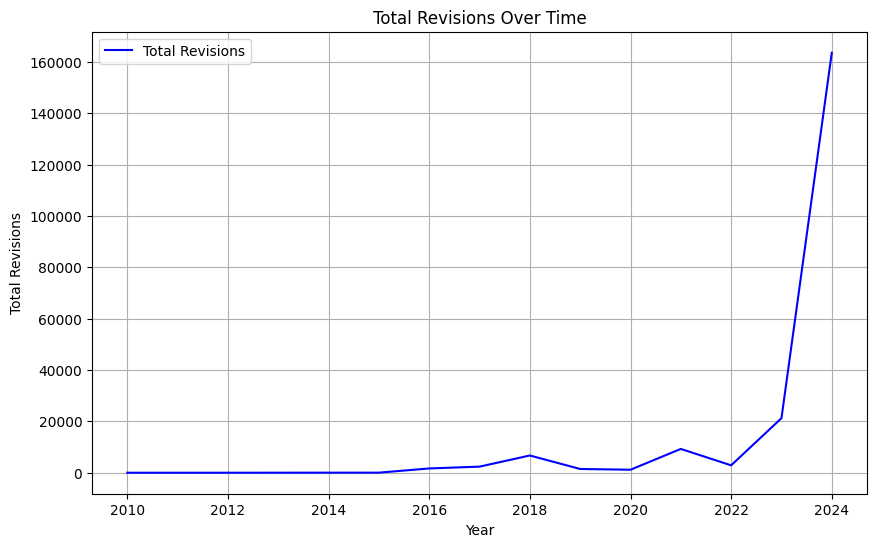

In [43]:
locality_grouped = pd.read_csv('../data/processed/london_stops_q2.csv')

# Convert 'most_recent_modification' to datetime
locality_grouped['most_recent_modification'] = pd.to_datetime(locality_grouped['most_recent_modification'])

# Set up the line chart for temporal trends
plt.figure(figsize=(10, 6))

# Group by year or month for aggregated analysis
locality_grouped['Year'] = locality_grouped['most_recent_modification'].dt.year

# Plot the total revisions by year
plt.plot(locality_grouped.groupby('Year')['total_revision_number'].sum(), label='Total Revisions', color='blue')
plt.title('Total Revisions Over Time')
plt.xlabel('Year')
plt.ylabel('Total Revisions')
plt.legend()
plt.grid(True)
plt.savefig('../outputs/line_graph_total_revisions_over_time.png')
plt.show()

## Question 3

In [47]:
!pip install geopandas
!pip install osmnx

   ---------------------------------------- 0.0/99.6 kB ? eta -:--:--
   -------- ------------------------------- 20.5/99.6 kB 640.0 kB/s eta 0:00:01
   -------------------- ------------------- 51.2/99.6 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 99.6/99.6 kB 1.1 MB/s eta 0:00:00


C:\Users\bretu\AppData\Local\Temp\ipykernel_30800\2536786405.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AdministrativeAreaCode', y='Density', data=density_data, palette='YlOrRd')


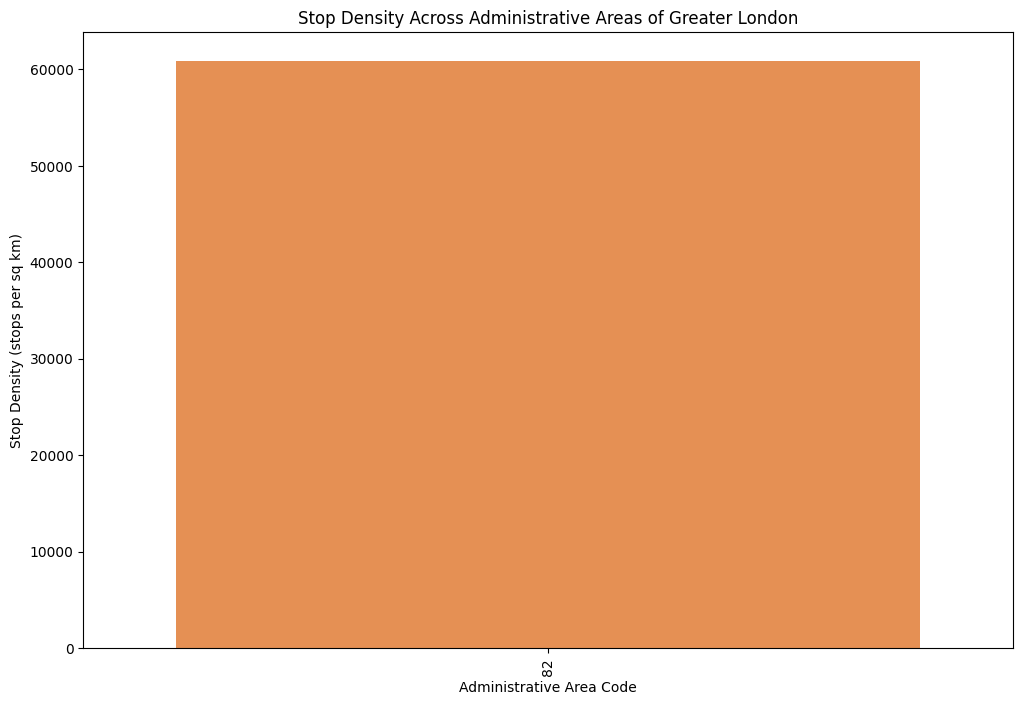

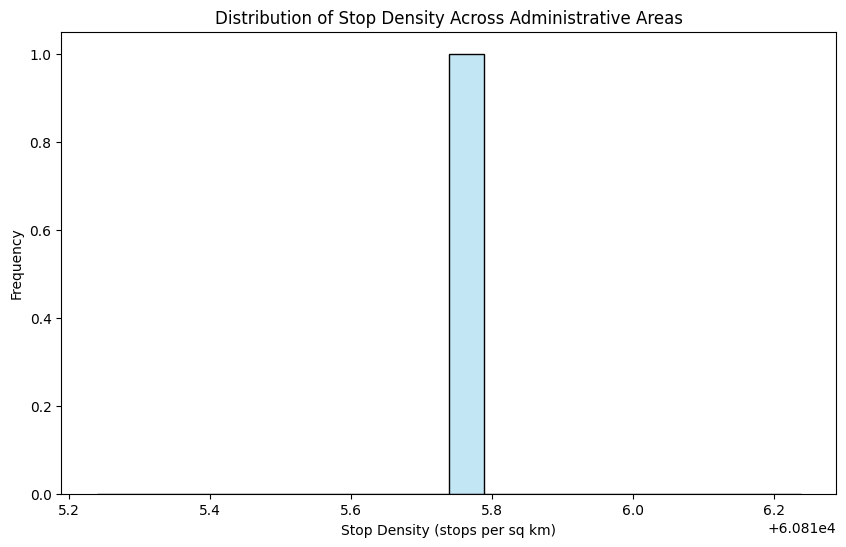

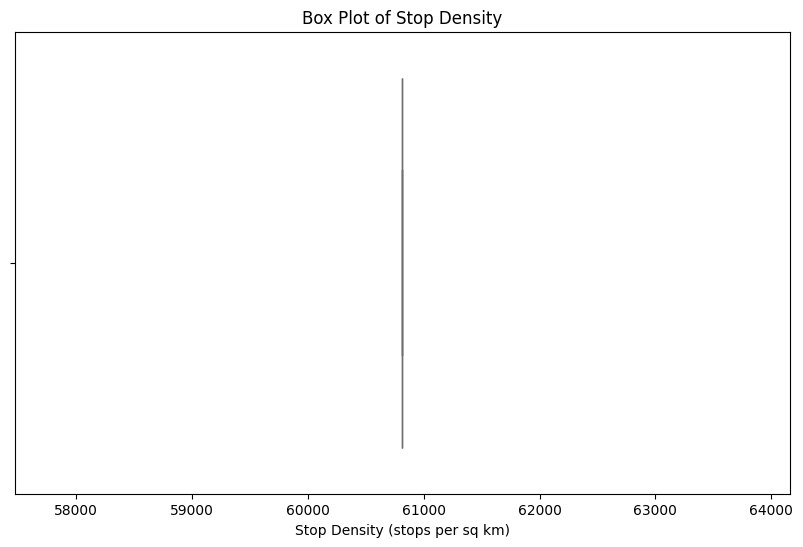

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
density_data = pd.read_csv('../data/processed/q3_processed_london_stops.csv')

# 1. Bar Plot of Stop Density across Administrative Areas
plt.figure(figsize=(12, 8))
sns.barplot(x='AdministrativeAreaCode', y='Density', data=density_data, palette='YlOrRd')
plt.title('Stop Density Across Administrative Areas of Greater London')
plt.xlabel('Administrative Area Code')
plt.ylabel('Stop Density (stops per sq km)')
plt.xticks(rotation=90)
plt.show()

# 2. Histogram of Stop Density
plt.figure(figsize=(10, 6))
sns.histplot(density_data['Density'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Stop Density Across Administrative Areas')
plt.xlabel('Stop Density (stops per sq km)')
plt.ylabel('Frequency')
plt.show()

# 3. Box Plot for Density
plt.figure(figsize=(10, 6))
sns.boxplot(x=density_data['Density'], color='lightcoral')
plt.title('Box Plot of Stop Densmty')
plt.xlabel('Stop Density (stops per sq km)')
plt.show()


In [57]:
# Inspect the first few rows and columns of gdf_london
print(density_data.columns)

Index(['AdministrativeAreaCode', 'StopCount', 'Density'], dtype='object')


C:\Users\bretu\AppData\Local\Temp\ipykernel_30800\819730960.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DensityCategory', data=density_data, palette='YlOrRd')


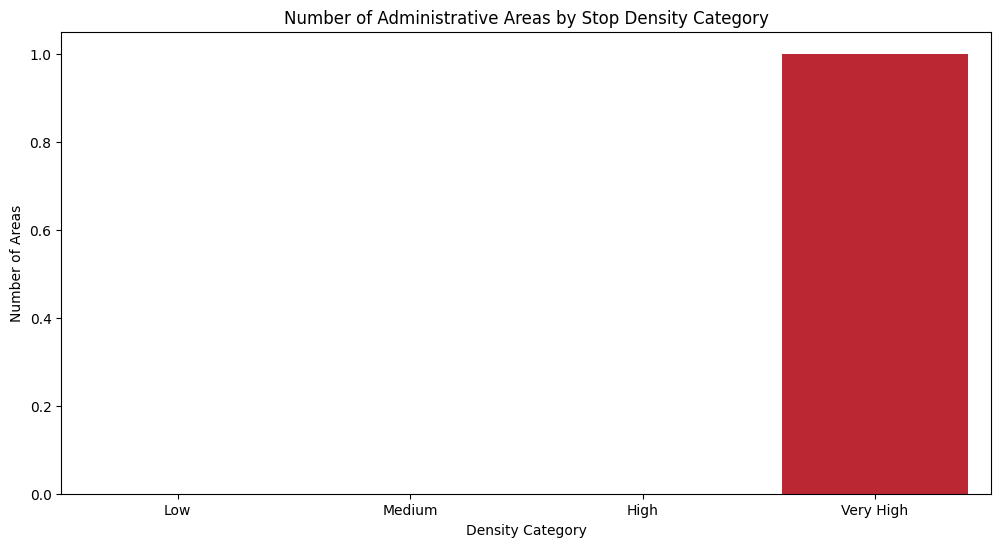

In [67]:
# Categorize areas by density (low, medium, high)
bins = [0, 5, 15, 30, np.inf]  # Adjust based on observed density ranges
labels = ['Low', 'Medium', 'High', 'Very High']
density_data['DensityCategory'] = pd.cut(density_data['Density'], bins=bins, labels=labels)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='DensityCategory', data=density_data, palette='YlOrRd')
plt.title('Number of Administrative Areas by Stop Density Category')
plt.xlabel('Density Category')
plt.ylabel('Number of Areas')
plt.show()

C:\Users\bretu\AppData\Local\Temp\ipykernel_30800\4010022578.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(density_data.pivot('DensityCategory', 'AdministrativeAreaCode', 'Density'), annot=True, cmap='coolwarm')


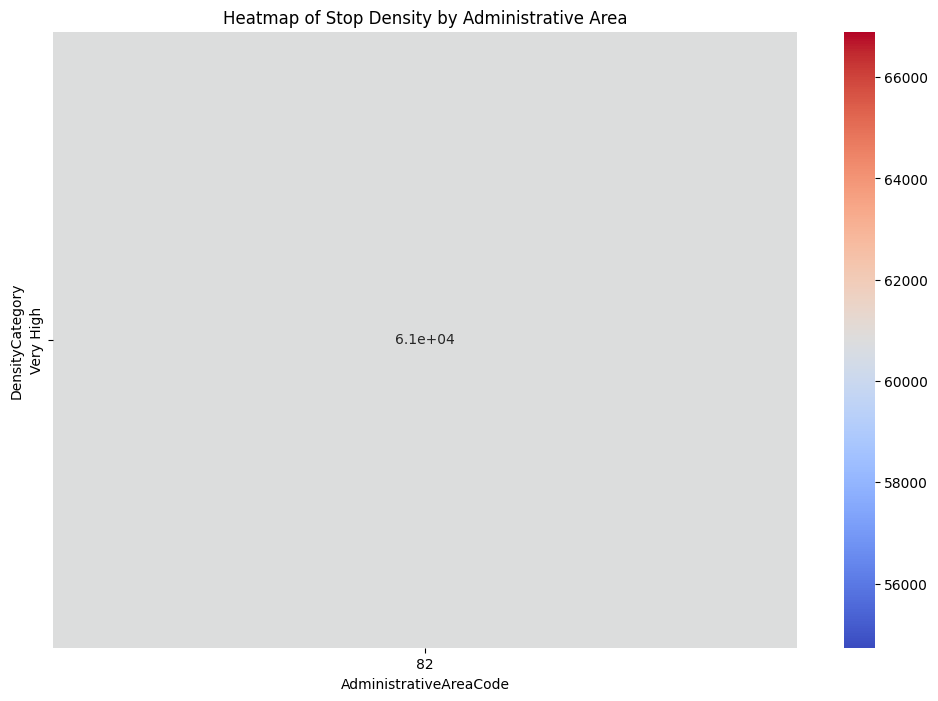

In [68]:
# Plotting the heatmap of stop density
plt.figure(figsize=(12, 8))
sns.heatmap(density_data.pivot('DensityCategory', 'AdministrativeAreaCode', 'Density'), annot=True, cmap='coolwarm')
plt.title('Heatmap of Stop Density by Administrative Area')
plt.show()

In [63]:
density_data = pd.read_csv('../data/processed/q3_processed_london_stops.csv')
density_data.dtypes

# Categorize areas by density (low, medium, high)
bins = [0, 5, 15, 30, np.inf]  # Adjust based on observed density ranges
labels = ['Low', 'Medium', 'High', 'Very High']
density_data['DensityCategory'] = pd.cut(density_data['Density'], bins=bins, labels=labels)

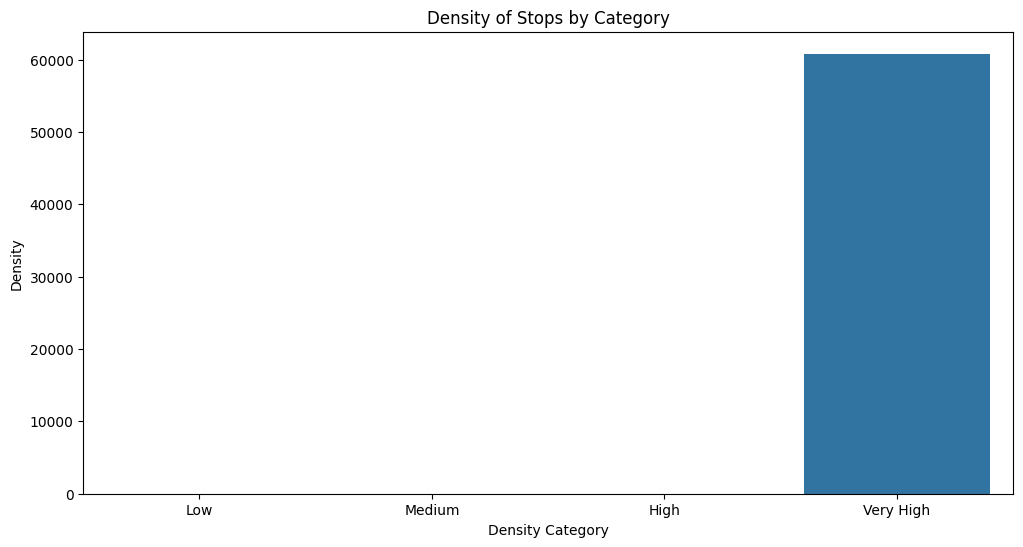

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x='DensityCategory', y='Density', data=density_data)
plt.title('Density of Stops by Category')
plt.xlabel('Density Category')
plt.ylabel('Density')
plt.show()

## Question 4

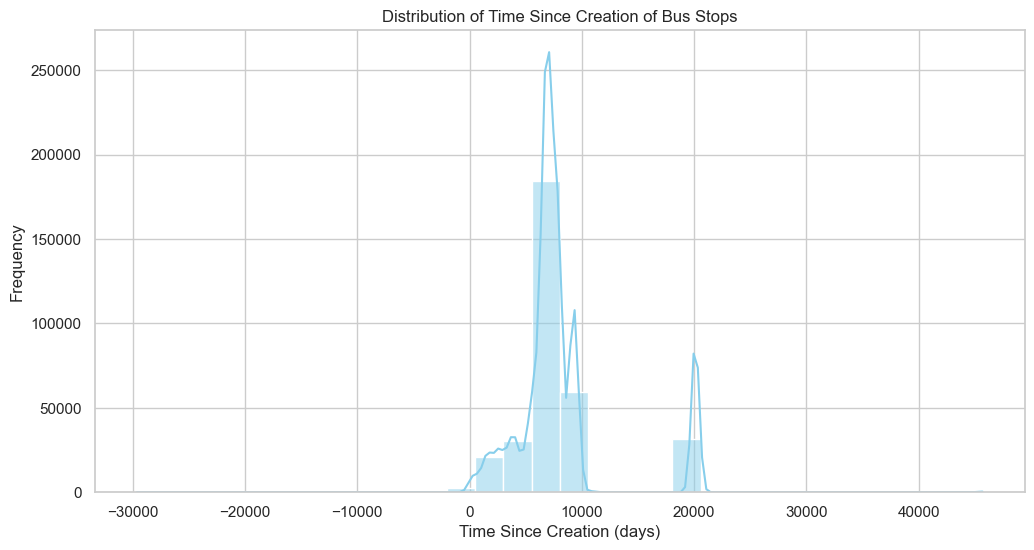

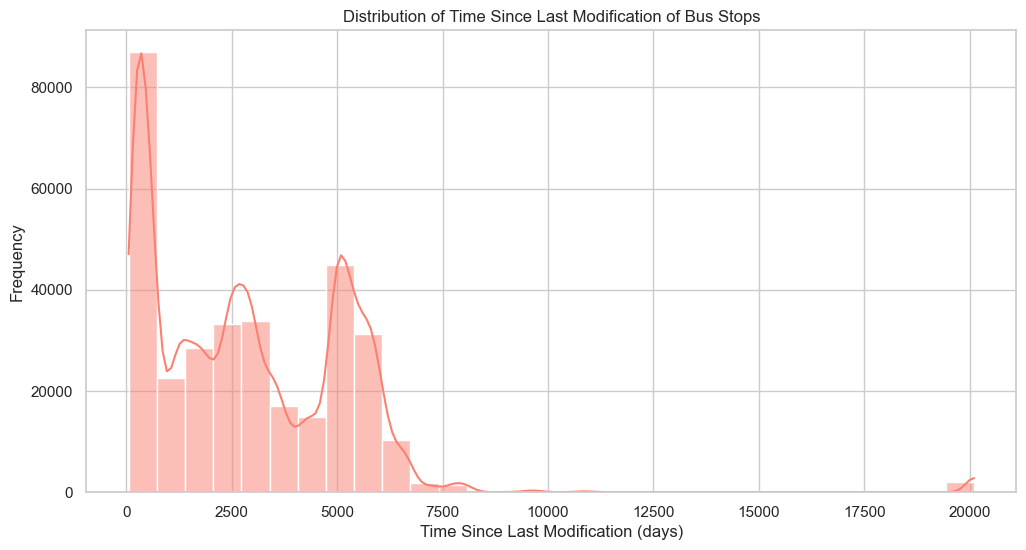

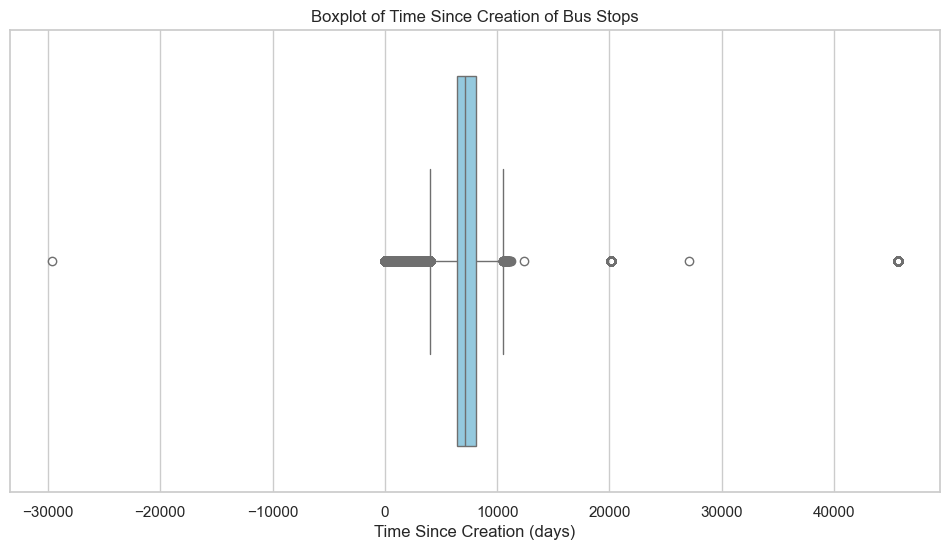

NameError: name 's' is not defined

<Figure size 1200x600 with 0 Axes>

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed file with temporal features
temporal_data = pd.read_csv('../data/processed/q4_processed_stops.csv')

# Set up seaborn style
sns.set(style="whitegrid")

# Plot the distribution of TimeSinceCreation
plt.figure(figsize=(12, 6))
sns.histplot(temporal_data['TimeSinceCreation'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Time Since Creation of Bus Stops')
plt.xlabel('Time Since Creation (days)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of TimeSinceModification
plt.figure(figsize=(12, 6))
sns.histplot(temporal_data['TimeSinceModification'], kde=True, color='salmon', bins=30)
plt.title('Distribution of Time Since Last Modification of Bus Stops')
plt.xlabel('Time Since Last Modification (days)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to check for outliers in TimeSinceCreation
plt.figure(figsize=(12, 6))
sns.boxplot(x=temporal_data['TimeSinceCreation'], color='skyblue')
plt.title('Boxplot of Time Since Creation of Bus Stops')
plt.xlabel('Time Since Creation (days)')
plt.show()

# Boxplot to check for outliers in TimeSinceModification
plt.figure(figsize=(12, 6))
s
